# Limits of k-Means

In [2]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from pandas import DataFrame
import seaborn as sn

In [3]:
# Some data preperation on Target-Dataset
features = open("../data/Target.lrn", "r")
labels = open("../data/Target.cls", "r")

X_target=[]
for x in features:
  X_target.append(x.split("\t"))

Y_target=[]
for y in labels:
  Y_target.append(y.split("\t"))

X_target = np.array(X_target[4:]).astype(np.float)
Y_target = np.array(Y_target[1:]).astype(np.float)

print(X_target[:2])
print(Y_target[:2])

[[ 1. -3. -3.]
 [ 2. -3.  3.]]
[[1. 5.]
 [2. 4.]]


In [4]:
# Remove the first rows
X_target = np.delete(X_target, 0, 1)
Y_target = np.delete(Y_target, 0, 1)

print("X:",X_target.shape)
print("Y:",Y_target.shape)

X: (770, 2)
Y: (770, 1)


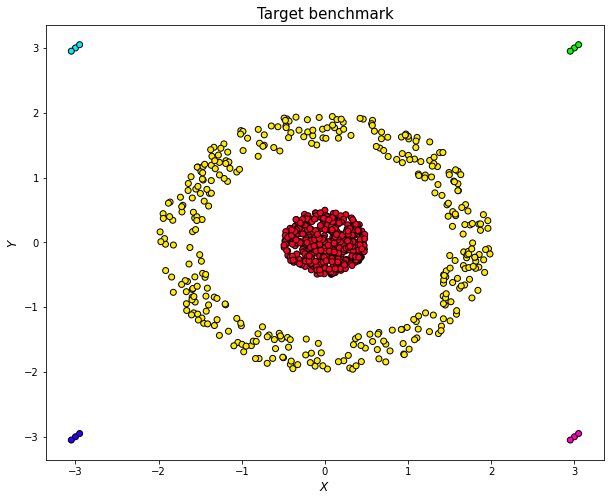

In [5]:
import matplotlib.cm as cm

plt.figure(figsize=(10, 8))
plt.scatter(X_target[:, 0], X_target[:, 1], 
            c=Y_target, edgecolor="black",
            cmap=cm.gist_rainbow)
plt.ylabel("$Y$", size=12)
plt.xlabel("$X$", size=12)
plt.title("Target benchmark", size=15)
plt.show()

In [ ]:
#TODO